# 의사결정 트리
## 의사결정 트리 데이터 생성하기

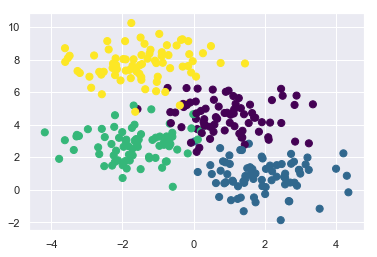

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis');

# 의사결정 트리의 간단한 데이터 분할 방법
- 정량적 기준에 따라 둘 중 하나의 축을 따라 반복적으로 데이터를 분할함

- 각 레벨에서 새로운 영역은 그 안에 포함된 점의 과반수를 얻은 표에 따라 레이블이 할당됨

- 첫 다섯 개의 레벨 시각화

In [42]:
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact

def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)


def plot_tree_interactive(X, y):
    def interactive_tree(depth=5):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    return interact(interactive_tree, depth=[1, 5])


def randomized_tree_interactive(X, y):
    N = int(0.75 * X.shape[0])
    
    xlim = (X[:, 0].min(), X[:, 0].max())
    ylim = (X[:, 1].min(), X[:, 1].max())
    
    def fit_randomized_tree(random_state=0):
        clf = DecisionTreeClassifier(max_depth=15)
        i = np.arange(len(y))
        rng = np.random.RandomState(random_state)
        rng.shuffle(i)
        visualize_tree(clf, X[i[:N]], y[i[:N]], boundaries=False,
                       xlim=xlim, ylim=ylim)
    
    interact(fit_randomized_tree, random_state=[0, 100]);

C:\Users\leedonguk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
C:\Users\leedonguk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
C:\Users\leedonguk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
C:\Users\leedonguk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
C:\Users\leedonguk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


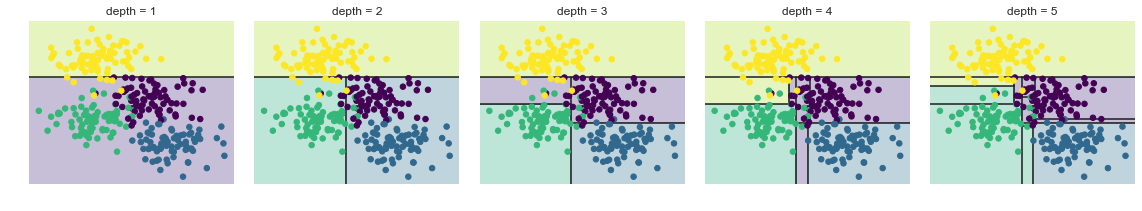

In [15]:
fig, ax = plt.subplots(1, 5, figsize=(16,3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

for axi, depth in zip(ax, range(1,6)):
    # 의사결정 트리
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

## 시각화한 의사결정 트리 분류

In [50]:
def visualize_classifier(model, X, y, ax=None, cmap='viridis'):
    ax=ax or plt.gca()
    
    # 훈련 데이터 점 프로팅
    ax.scatter(X[:, 0],X[:, 1], c=y, s =30, cmap=cmap, 
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 모델 적합
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # 결과를 이용해 컬러 플롯 생성
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1)-0.5, 
                          cmap=cmap, clim=(y.min(), y.max()), zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

# 2. 추정 모델의 앙상블: 랜덤 포레스트
## 배깅(bagging)
- 여러 과적합 추정 모델의 앙상블을 사용하고 그 결과를 평균 내어 더 나은 분류를 구하는 기법

## 배깅 분류
- 임의의 의사결정 트리의 앙상블에서의 결정 경계

(-2.494925513419171, 10.867910112115798)


C:\Users\leedonguk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


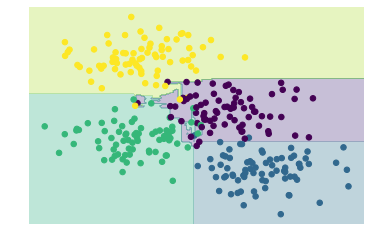

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
# n_estimators : 모형 갯수(트리개수), max_samples : 데이터 샘플 중 선택할 샘플의 수 혹은 비율
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

## 랜덤 포레스트
- 의사결정 트리의 최적화된 앙상블인 랜덤 포레스트에서의 결정 경계

C:\Users\leedonguk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


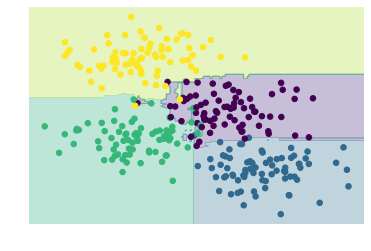

In [52]:
from sklearn.ensemble import RandomForestClassifier

ㅕㅑ89
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

## 랜덤 포레스트를 사용한 숫자 분류
- 숫자 데이터 적재

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

- 적재된 숫자 데이터 시각화

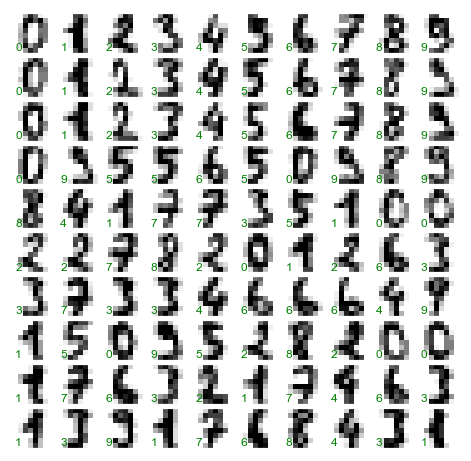

In [34]:
fig, axes = plt.subplots(10, 10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

- 입력 데이터 학습

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                               random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

- 랜덤 포레스트 분류기에 대한 보고서

In [37]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



- 모델 성능 확인을 위한 오차 행렬

Text(89.18, 0.5, 'true label')

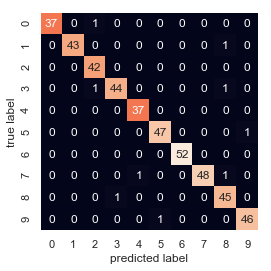

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label')